## **Importing necessary libraries**

In [11]:
# To ignore the warnings
# onyx\Scripts\activate
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

from sklearn import tree

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [12]:
invest_df = pd.read_csv("ML_Data_CSV_2.csv")

invest_df.info()
invest_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OpportunityType  429 non-null    object 
 1   State            429 non-null    object 
 2   Industry         429 non-null    object 
 3   OfftakerSector   429 non-null    object 
 4   Fund             429 non-null    object 
 5   IRR              429 non-null    float64
 6   EPC              429 non-null    float64
 7   Size             429 non-null    float64
dtypes: float64(3), object(5)
memory usage: 26.9+ KB


,OpportunityType,State,Industry,OfftakerSector,Fund,IRR,EPC,Size
0,M&A,CA,Government,Industrial/Manufacturing,Nova I,0.203,2.70,599.39
1,M&A,CA,Technology,Industrial/Manufacturing,Nova I,0.207,2.32,623.81
2,M&A,CA,Education,MUSH/Non-Profit,Janus I,0.200,2.69,217.00
3,RFP,NJ,Energy,MUSH/Non-Profit,Janus I,0.224,0.15,28.80
4,Non-RFP,MD,Recreation,Military,Solar Mission I,0.154,2.48,358.54


## **Data Preprocessing**

In [13]:
## Getting Rid of any Empty Values

'''

# 1) Fill missing values in the OfftakerSector column with the mode of the column
offtaker_sector_mode = invest_df['OfftakerSector'].mode()[0]
invest_df['OfftakerSector'] = invest_df['OfftakerSector'].fillna(offtaker_sector_mode)

Industry_mode = invest_df['Industry'].mode()[0]
invest_df['Industry'] = invest_df['Industry'].fillna(Industry_mode)

OpportunityType_mode = invest_df['OpportunityType'].mode()[0]
invest_df['OpportunityType'] = invest_df['OpportunityType'].fillna(OpportunityType_mode)

# 2) Check for NaN values in each column and count them
nan_counts = invest_df.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

'''

## Binning

# 3) Grouping the columns: Fund

# Define bins and labels for fund periods


fund_bins = [
    'Solar Mission II', 'Solar Mission III', 'EPC Only', 'Onyx', 'Other - See Finance',
    'Solar Mission I', 'Obsidian I',
    'CTA2', 'Phoenix I', 
    'Janus I', 'Janus II', 'Obsidian II',
    'Phoenix II', 'Sunbird I', 'Nova I'  
]

periods = [
    'Fund_Period_0', 'Fund_Period_0', 'Fund_Period_0', 'Fund_Period_0', 'Fund_Period_0',
    'Fund_Period_1', 'Fund_Period_1',
    'Fund_Period_2', 'Fund_Period_2',
    'Fund_Period_3', 'Fund_Period_3', 'Fund_Period_3',
    'Fund_Period_4', 'Fund_Period_4', 'Fund_Period_4'
]


# Map to periods
fund_mapping = dict(zip(fund_bins, periods))
invest_df['Fund'] = invest_df['Fund'].map(fund_mapping)

'''
# One-hot encode the 'Fund' column
invest_df = pd.get_dummies(invest_df, columns=['Fund'], prefix='Fund', drop_first=False)

'''

# 4) Encoding all the other values

invest_df.OpportunityType = pd.factorize(invest_df.OpportunityType)[0]
invest_df.Industry = pd.factorize(invest_df.Industry)[0]
invest_df.OfftakerSector = pd.factorize(invest_df.OfftakerSector)[0]
invest_df.State = pd.factorize(invest_df.State)[0]
invest_df.Fund = pd.factorize(invest_df.Fund)[0]

invest_df.sample(10)

print(invest_df.head(10))

   OpportunityType  State  Industry  OfftakerSector  Fund    IRR   EPC  \
0                0      0         0               0     0  0.203  2.70   
1                0      0         1               0     0  0.207  2.32   
2                0      0         2               1     1  0.200  2.69   
3                1      1         3               1     1  0.224  0.15   
4                2      2         4               2     2  0.154  2.48   
5                0      0         3               3     0  0.220  2.73   
6                0      3         5               2     3  0.164  1.88   
7                0      4         5               2     3  0.162  1.55   
8                0      4         5               2     3  0.163  1.45   
9                0      1         1               0     3  0.205  2.34   

      Size  
0   599.39  
1   623.81  
2   217.00  
3    28.80  
4   358.54  
5  3021.74  
6  1008.70  
7   280.80  
8   279.24  
9   312.12  


## **Save Factorization Mappings**

In [14]:
# Saving mappings for all categorical variables
opportunity_type_map = {v: k for k, v in enumerate(invest_df['OpportunityType'].unique())}
state_map = {v: k for k, v in enumerate(invest_df['State'].unique())}
offtaker_sector_map = {v: k for k, v in enumerate(invest_df['OfftakerSector'].unique())}
# Create mapping for fund period names (in order of one-hot encoded columns)
fund_columns = [col for col in invest_df.columns if col.startswith('Fund_')]
fund_map = {col.replace('Fund_', ''): idx for idx, col in enumerate(fund_columns)}
print(invest_df.head(10))

   OpportunityType  State  Industry  OfftakerSector  Fund    IRR   EPC  \
0                0      0         0               0     0  0.203  2.70   
1                0      0         1               0     0  0.207  2.32   
2                0      0         2               1     1  0.200  2.69   
3                1      1         3               1     1  0.224  0.15   
4                2      2         4               2     2  0.154  2.48   
5                0      0         3               3     0  0.220  2.73   
6                0      3         5               2     3  0.164  1.88   
7                0      4         5               2     3  0.162  1.55   
8                0      4         5               2     3  0.163  1.45   
9                0      1         1               0     3  0.205  2.34   

      Size  
0   599.39  
1   623.81  
2   217.00  
3    28.80  
4   358.54  
5  3021.74  
6  1008.70  
7   280.80  
8   279.24  
9   312.12  


Extracting samples from the original data to create the train data (80%) and the test data (20%).

## **Splitting the dataset**

In [15]:
pcnt = .8

# Random state is a seed value
train = invest_df.sample(frac = pcnt, random_state = 14)

test = invest_df.drop(train.index)

# Create train and test datasets

X_train = train[['OpportunityType', 'State', 'OfftakerSector', 'Fund', 'EPC', 'Size']]

X_test = test[['OpportunityType', 'State', 'OfftakerSector', 'Fund', 'EPC', 'Size']]

y_train = train['IRR']

y_test = test['IRR']

np.random.seed(0)

decision tree with 6 levels (max_depth = 5) and visualize the same.

## **Random Forest Regressor**

Train RMSE Scores: [np.float64(0.017956867456895693), np.float64(0.012051250458049013), np.float64(0.009245499296537398), np.float64(0.005413007996333866), np.float64(0.003635062780497695), np.float64(0.0026665334830759005), np.float64(0.0023849381267216176), np.float64(0.002294591824669206), np.float64(0.0021951544290238077)]
Test RMSE Scores: [np.float64(0.02186692838299032), np.float64(0.014456992083406273), np.float64(0.011076969625890793), np.float64(0.007387335997693331), np.float64(0.0060422218005431625), np.float64(0.005078919545764558), np.float64(0.004565924623284149), np.float64(0.004626626757084634), np.float64(0.0044445231544980816)]


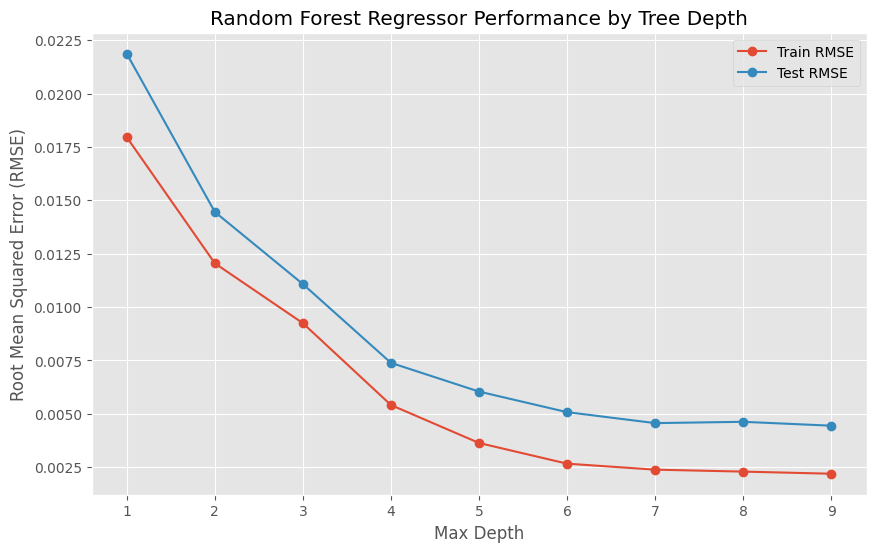

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

train_rmse_scores = []
test_rmse_scores = []

for depth in range(1, 10):
    clf = RandomForestRegressor(
        random_state=0,
        criterion='squared_error',
        max_depth=depth,
        n_estimators=25
    )

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Print RMSE scores
print('Train RMSE Scores:', train_rmse_scores)
print('Test RMSE Scores:', test_rmse_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), train_rmse_scores, '-o', label='Train RMSE')
plt.plot(range(1, 10), test_rmse_scores, '-o', label='Test RMSE')

plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Random Forest Regressor Performance by Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#Final Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

train_errors = []
test_errors = []

clf = RandomForestRegressor(
    random_state=0,
    criterion='squared_error',  # correct for regression
    max_depth=8,
    n_estimators=25
)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Using RMSE instead of 1 - R²
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(train_rmse)
print(test_rmse)

0.002294591824669206
0.004626626757084634


## **Decision Tree**

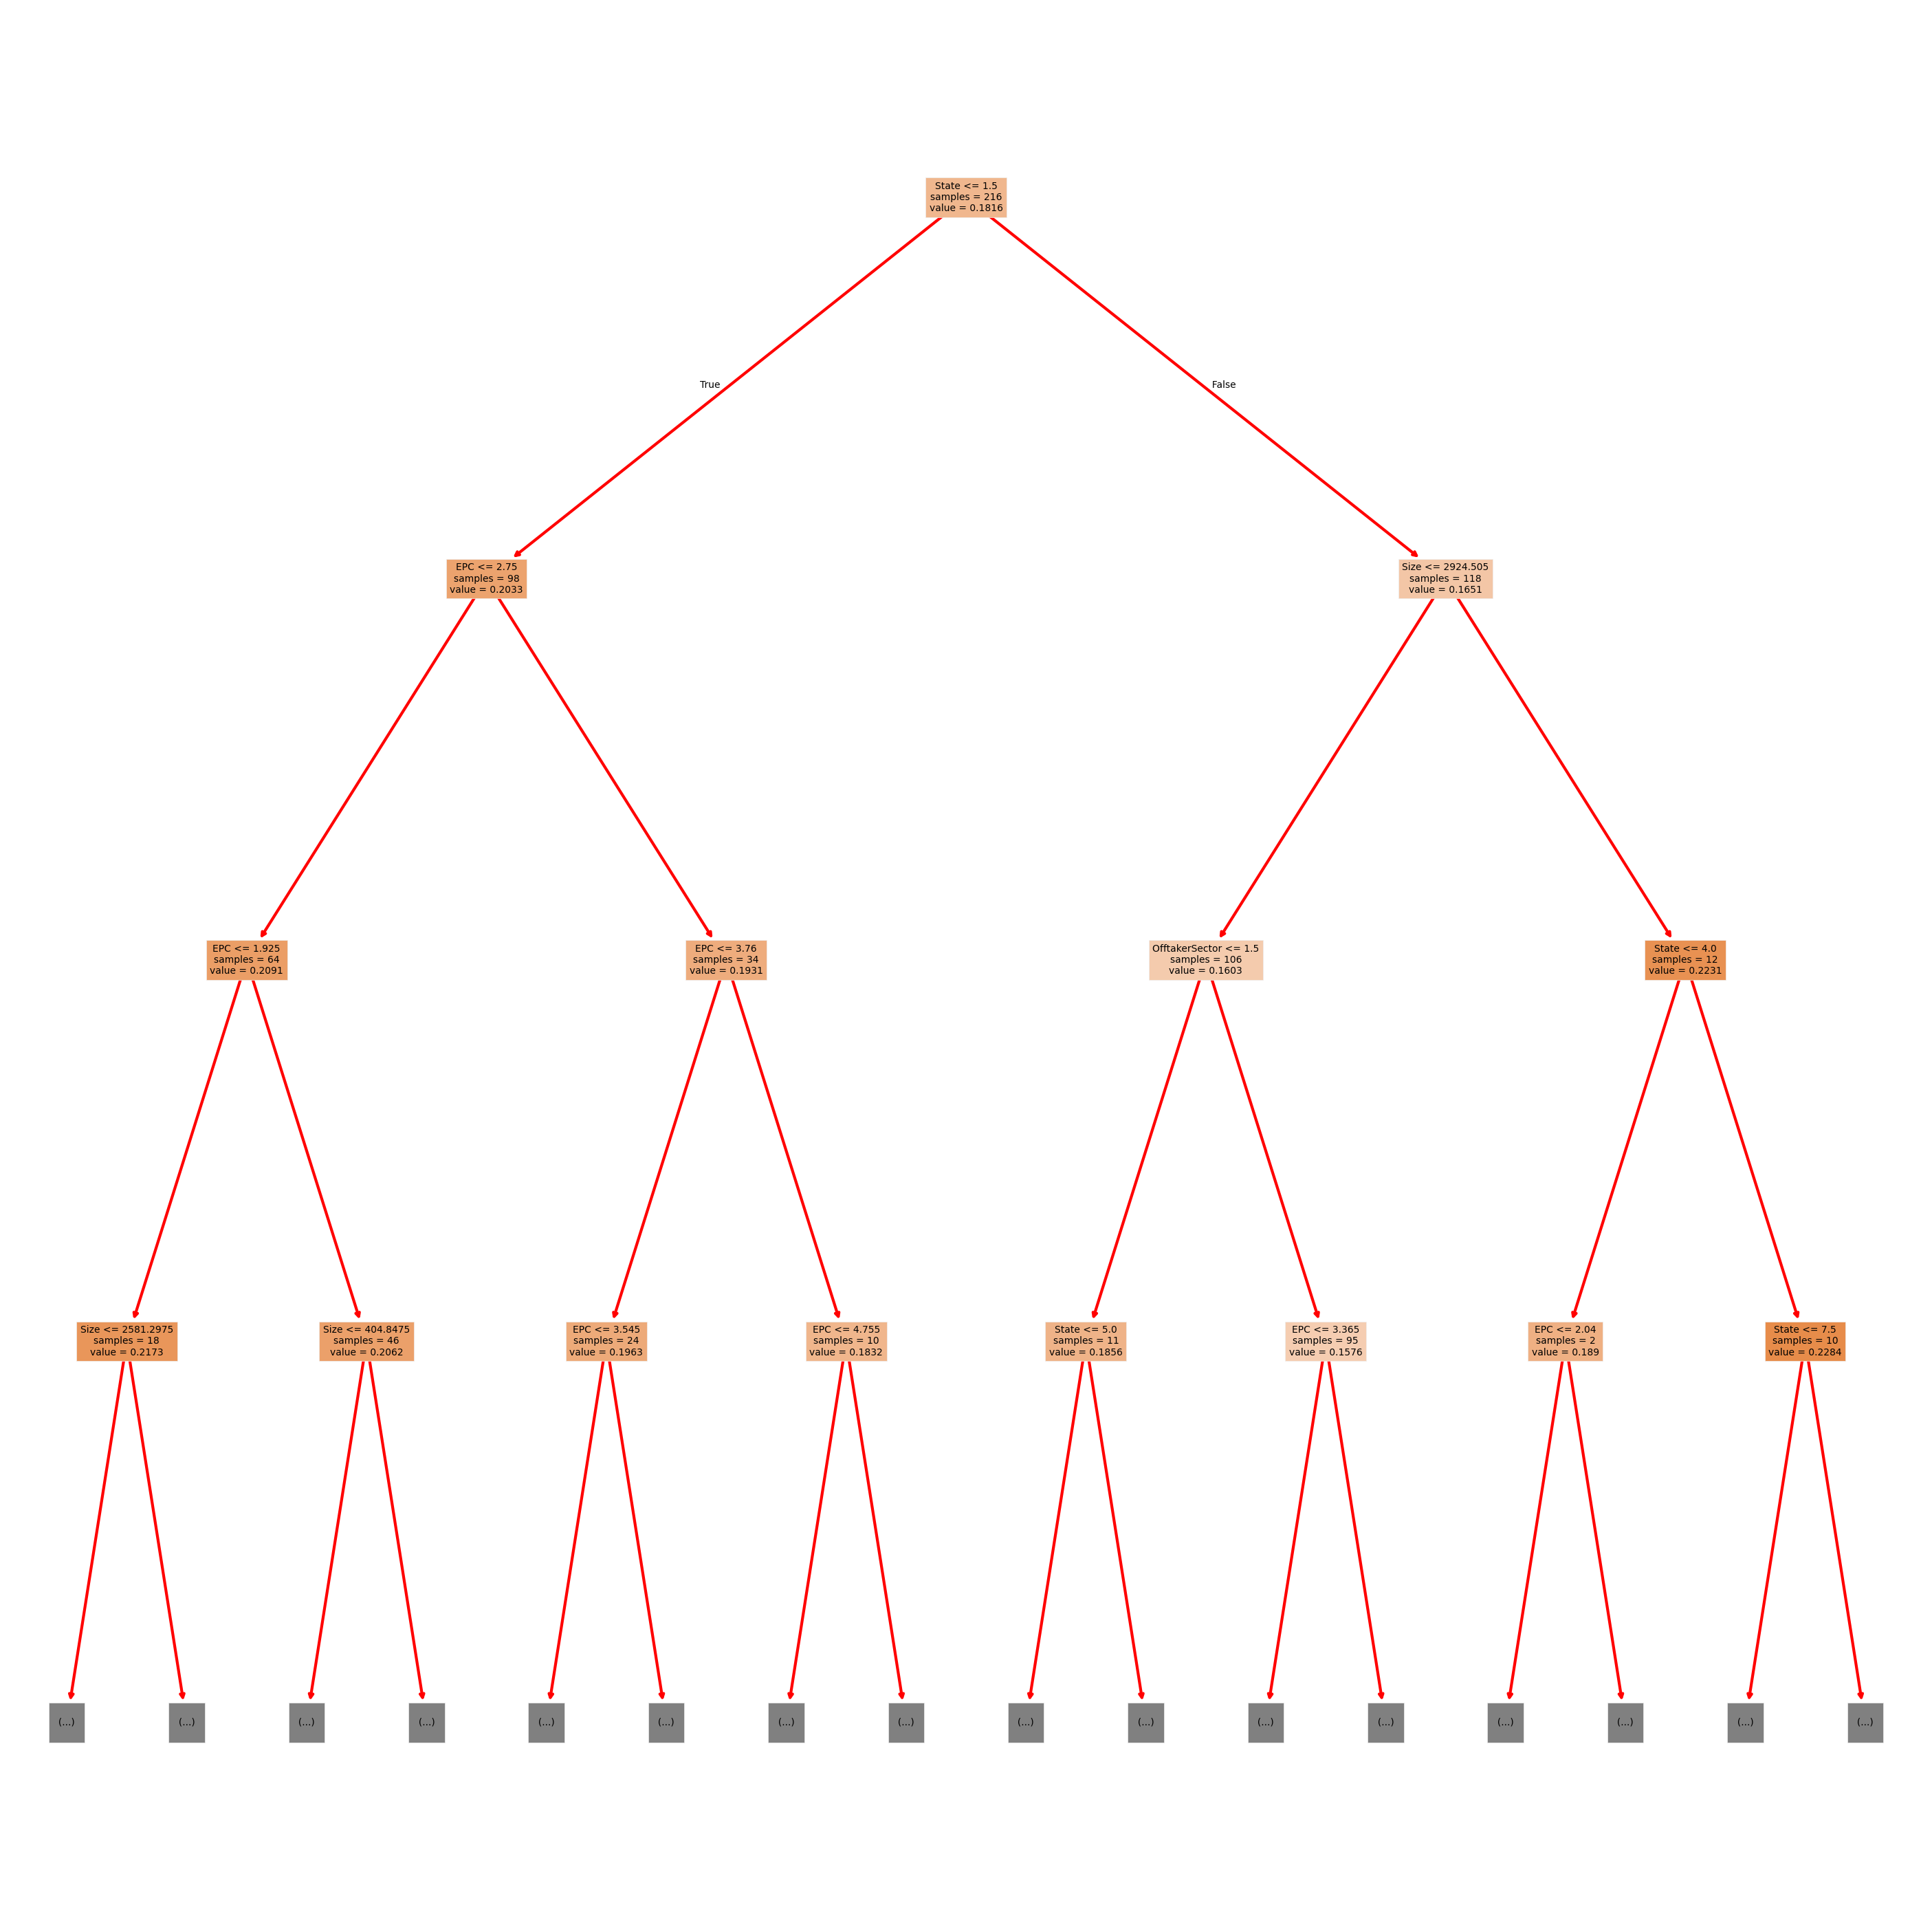

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract the first decision tree from the trained RandomForestRegressor
first_tree = clf.estimators_[0]  # You can change the index to look at different trees

# Plot the tree
fig, ax = plt.subplots(figsize=(36, 36))

out = tree.plot_tree(
    first_tree,
    fontsize=10,
    max_depth=3,  # match your model's max_depth
    impurity=False,
    filled=True,
    feature_names=['OpportunityType', 'State', 'OfftakerSector', 'Fund', 'EPC', 'Size'],
    precision=4  # display float values with 4 decimal places
)

# Optional: Make the arrows red and thicker
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

# Show the plot
plt.show()

## **Predictor Function**

In [19]:
import joblib  # For saving and loading models
import numpy as np

# Save the model (optional)
# joblib.dump(clf, 'random_forest_regressor.pkl')

# Load the model (optional)
# clf = joblib.load('random_forest_regressor.pkl')

# Function to encode input similar to training data
def encode_input(opportunity_type, state, offtaker_sector, fund, epc, size):
    # Safely map input values, assigning -1 if unseen
    opportunity_type_encoded = opportunity_type_map.get(opportunity_type, -1)
    state_encoded = state_map.get(state, -1)
    offtaker_sector_encoded = offtaker_sector_map.get(offtaker_sector, -1)
    fund_encoded = fund_map.get(fund, -1)

    return [opportunity_type_encoded, state_encoded, offtaker_sector_encoded, fund_encoded, epc, size]

# Input from the user
opportunity_type = input("Enter Opportunity Type: ")
state = input("Enter State: ")
offtaker_sector = input("Enter Offtaker Sector: ")
fund = input("Enter Fund: ")
epc = float(input("Enter EPC value: "))
size = float(input("Enter Size: "))

# Preprocess the input
user_input = np.array([encode_input(opportunity_type, state, offtaker_sector, fund, epc, size)])

# Predict IRR (numerical)
predicted_irr = clf.predict(user_input)[0]

# Display the result
print(f"Predicted IRR: {predicted_irr:.4f} or {predicted_irr * 100:.2f}%")

Predicted IRR: 0.2120 or 21.20%


## **Confidence Estimate**

In [20]:
#Method: Use standard deviation of tree predictions

# Get predictions from each individual tree
all_preds = np.array([tree.predict(user_input)[0] for tree in clf.estimators_])

# Compute mean and standard deviation
pred_mean = np.mean(all_preds)
pred_std = np.std(all_preds)

print(f"Predicted IRR: {pred_mean:.4f} or {pred_mean * 100:.2f}%")
print(f"Estimated Uncertainty (±1 std): ±{pred_std:.4f} or ±{pred_std * 100:.2f}%")


Predicted IRR: 0.2120 or 21.20%
Estimated Uncertainty (±1 std): ±0.0014 or ±0.14%


If pred_std is low, trees agree, and the model is confident.
If pred_std is high, trees disagree, and the model is uncertain.
This is particularly helpful when:

One or more inputs are unseen (-1) or unexpected.
The input data point is far from the training distribution (a.k.a. an outlier).


## **Visuals**

1. 2D Decision Boundary Plot (for Top Features)
Plot the decision boundaries of the Random Forest model using the two most influential features (e.g., Size and EPC).
Overlay the predicted IRR points, with different colors representing different *IRR* ranges.
2. Feature Importance + Prediction Overlay
Use a horizontal bar plot to show feature importances from the Random Forest model.
On a separate subplot, overlay the actual predictions on a scatter plot where size or color encodes the predicted IRR range.
3. Partial Dependence Plot (PDP)
Generate PDPs for key features like Size and EPC to show how they influence the IRR predictions.
Overlay actual prediction points to show how closely they align with the model's expectations.
4. 3D Scatter Plot
Create a 3D scatter plot using EPC, Size, and the predicted IRR as the axes.
Use different colors to represent distinct IRR bins, providing a depth view of the decision space.
5. Confusion Matrix Heatmap
Display how the model performed across different IRR bins, highlighting where misclassifications occurred.
6. Interactive Plot (using Plotly)
Build an interactive plot where hovering over a data point shows the full set of inputs and predicted IRR range.
"""

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
# 1. 2D Decision Boundary Plot (using 'EPC' and 'Size')

def plot_decision_boundary():
    from matplotlib.colors import ListedColormap

    # Extract the relevant features
    X = X_train[['EPC', 'Size']].values
    y = y_train

    h = .2  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use mode for categorical features
    mode_values = X_train.mode().iloc[0]
    other_features = [mode_values[col] for col in ['OpportunityType', 'State', 'OfftakerSector', 'Fund']]

    # Preparing prediction data in batches
    mesh_data = []
    batch_size = 10000
    raveled_len = len(xx.ravel())
    
    for i in range(0, raveled_len, batch_size):
        batch_length = min(batch_size, raveled_len - i)
        batch = np.c_[
            np.full(batch_length, other_features[0]),  # OpportunityType
            np.full(batch_length, other_features[1]),  # State
            np.full(batch_length, other_features[2]),  # OfftakerSector
            np.full(batch_length, other_features[3]),  # Fund
            xx.ravel()[i:i + batch_length],            # EPC
            yy.ravel()[i:i + batch_length]             # Size
        ]
        mesh_data.append(clf.predict(batch))

    # Concatenate and reshape the results
    Z = np.concatenate(mesh_data)
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.xlabel('EPC')
    plt.ylabel('Size')
    plt.title('Decision Boundary with Predicted Points')
    plt.show()

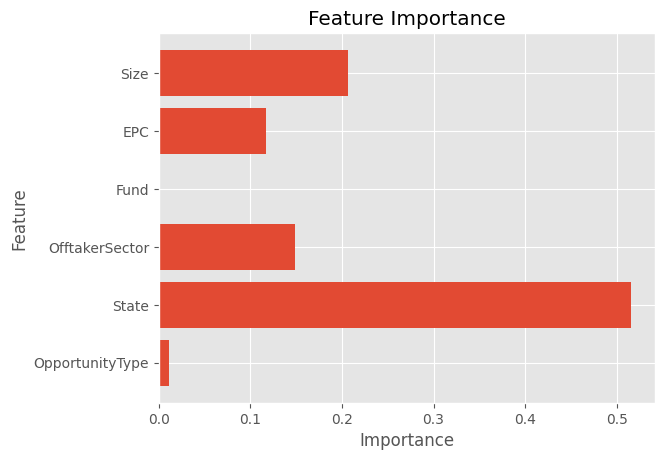

In [23]:
# 2. Feature Importance + Prediction Overlay
def feature_importance_plot():
    importances = clf.feature_importances_
    features = X_train.columns

    plt.barh(features, importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

feature_importance_plot()

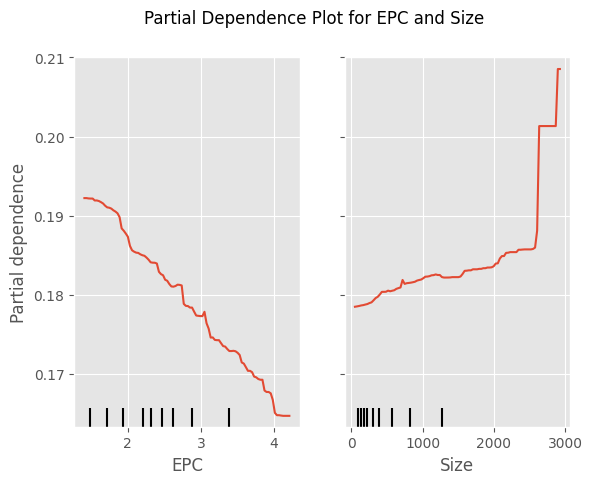

In [24]:
# 3. Partial Dependence Plot (PDP)
def partial_dependence_plot():
    display = PartialDependenceDisplay.from_estimator(clf, X_train, ['EPC', 'Size'], target=0)
    display.figure_.suptitle('Partial Dependence Plot for EPC and Size')
    plt.show()

partial_dependence_plot()

In [25]:
# 4. 3D Scatter Plot
def scatter_3d_plot():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train['EPC'], X_train['Size'], y_train, c=y_train, cmap='viridis')
    ax.set_xlabel('EPC')
    ax.set_ylabel('Size')
    ax.set_zlabel('Predicted IRR')
    plt.title('3D Scatter Plot')
    plt.show()

#scatter_3d_plot()

In [26]:
# 5. Confusion Matrix Heatmap
def confusion_matrix_plot():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

#confusion_matrix_plot()

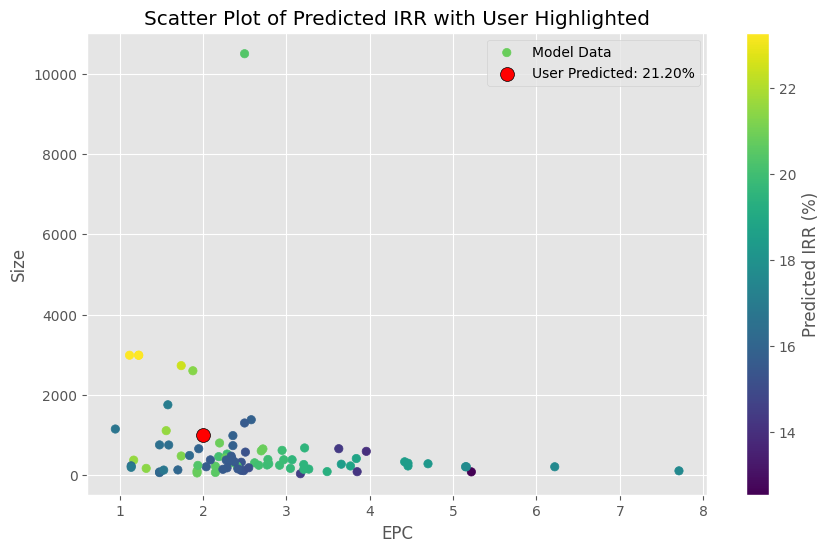

In [27]:
# 6. Simple Scatter Plot with User Prediction
def simple_scatter_plot():
    # Predict continuous IRR values
    predicted_irr = clf.predict(X_test)

    # Prepare the DataFrame
    df = X_test.copy()
    df['Predicted IRR'] = predicted_irr * 100  # Convert to % for readability

    # Predict for the user
    user_predicted_irr = clf.predict(user_input)[0] * 100  # Also as %

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['EPC'], df['Size'], c=df['Predicted IRR'], cmap='viridis', label='Model Data')
    plt.colorbar(scatter, label='Predicted IRR (%)')  # Show color scale

    # Add user prediction
    plt.scatter(user_input[0][4], user_input[0][5], c='red', s=100, edgecolors='black',
                label=f'User Predicted: {user_predicted_irr:.2f}%')

    plt.xlabel('EPC')
    plt.ylabel('Size')
    plt.title('Scatter Plot of Predicted IRR with User Highlighted')
    plt.legend()
    plt.show()
simple_scatter_plot()

In [28]:
import pandas as pd
import plotly.graph_objects as go

# Load your CSV file
df = pd.read_csv("ML_Data_CSV_2.csv")

# Calculate average IRR by state
state_irr = df.groupby("State")["IRR"].mean().reset_index()
state_irr_dict = dict(zip(state_irr["State"], state_irr["IRR"]))

# List of all 50 U.S. state abbreviations
all_state_abbr = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Create hover text and color scale
hover_text = []
colors = []
z_values = []

for state in all_state_abbr:
    if state in state_irr_dict:
        irr_value = round(state_irr_dict[state] * 100, 1)
        hover_text.append(f"{irr_value}%")
        colors.append("blue")
        z_values.append(1)
    else:
        hover_text.append("")
        colors.append("lightgray")
        z_values.append(0)

# Build the map
fig = go.Figure(data=go.Choropleth(
    locations=all_state_abbr,
    z=z_values,
    locationmode='USA-states',
    colorscale=[[0, 'lightgray'], [1, 'blue']],
    showscale=False,
    text=hover_text,
    hoverinfo='text'
))

fig.update_layout(
    title_text='Average IRR by State (Blue = Highlighted)',
    geo=dict(scope='usa')
)

fig.show()


## **Save Factorization Mappings**

## **Train and Save Model**

In [29]:
import joblib

# Train your model (Ensure this is already done in your notebook)
model = clf

# Define the path where the model will be saved
model_path = "model.pkl2"

# Save the trained model
joblib.dump(model, model_path)

print(f"Model saved successfully to {model_path}")

Model saved successfully to model.pkl2
